In [1]:
#tutorial: https://towardsdatascience.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
import urllib.request
import requests
import nltk
import seaborn as sns
from bs4 import BeautifulSoup
import os
from flask import request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option('display.max_colwidth', -1)


C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [2]:
finwiz_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}

tickers = ['DIS']

# Parsing the URL for the ticker symbols

In [19]:
for ticker in tickers:
    url = finwiz_url + ticker
    req = urllib.request.Request(url=url,headers={'user-agent': 'my-app/0.0.1'})
    response = urllib.request.urlopen(req)
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [26]:
vr = news_tables['DIS']

# Analysis: Pulls the top 10 most recent articles for ticker symbol ___ (Not all dates are placed)

In [27]:
vr_tr = vr.findAll('tr')
vr_tr

for i, table_row in enumerate(vr_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 10:
        break

The Batman rules box office again, while BTS concert makes a pop
Mar-13-22 04:40PM  
Disney Has More New Attractions Coming to its Florida Theme Parks
Mar-12-22 08:27PM  
Disney CEO Makes It Clear a Big Price Increase Is Coming (Here's When)
08:24PM  
Why Disney+ Subscriber Growth Is About to Explode
09:00AM  
Is It a Good Time To Buy a House? (Here's What You Should Know.)
08:00AM  
Disneys Bob Chapek apologises to staff over response to Dont Say Gay bill
Mar-11-22 08:56PM  
Disney CEO Tried to Avoid Politics, Now Finds Himself in Middle of Partisan Spat
07:26PM  
UPDATE 2-Disney to pause Florida political donations over law limiting LGBTQ discussion
02:40PM  
Rihanna's Savage X Fenty eyes $3B IPO, expanding empire, female entrepreneur status
01:47PM  
Why Is Disney (DIS) Down 12.2% Since Last Earnings Report?
11:30AM  
JAKKS Pacific (JAKK) Rises 13% in 6 Months: More Upside Left?
10:02AM  


In [260]:
td_text

'Dec-21-20 01:47PM\xa0\xa0'

In [261]:
a_text

'Is CCL A Good Stock To Buy According To Hedge Funds?'

# Pulling articles for ticker symbol ___ and print ticker info. to a list

In [262]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['nclh',
  'Dec-24-20',
  '05:25PM',
  "Does Stimulus Package Make Carnival Stock A Buy Right Now? Here's What Earnings, Charts Show"],
 ['nclh',
  'Dec-23-20',
  '12:40PM',
  'Why Carnival Corporation, Royal Caribbean, and Norwegian Cruise Line Stocks Recovered Today'],
 ['nclh',
  'Dec-22-20',
  '11:13AM',
  'J.P. Morgan: 2 Cruise Line Stocks to Bet on (And 1 to Avoid)'],
 ['nclh',
  'Dec-22-20',
  '06:37AM',
  'The cruise industry wont return to pre-pandemic levels until 2030: analyst'],
 ['nclh',
  'Dec-21-20',
  '09:22PM',
  "Among This Year's Dogs, These 2 Could Hunt"],
 ['nclh',
  'Dec-21-20',
  '03:34PM',
  '81% of luxury passengers plan to take a cruise in 2021: Rpt'],
 ['nclh', 'Dec-21-20', '02:48PM', 'Is It Time to Invest in Cuba?'],
 ['nclh',
  'Dec-21-20',
  '12:06PM',
  'Why Carnival, Royal Caribbean, and Norwegian Cruise Line Stocks Fell Today'],
 ['nclh',
  'Dec-21-20',
  '07:46AM',
  'Ranking Cruise Line Stocks in 2021 Is as Easy as 1, 2, 3'],
 ['nclh',
  'Dec-18-20',

In [263]:
parsedf = pd.DataFrame(parsed_news)
parsedf.head(15)

,0,1,2,3
0,nclh,Dec-24-20,05:25PM,"Does Stimulus Package Make Carnival Stock A Buy Right Now? Here's What Earnings, Charts Show"
1,nclh,Dec-23-20,12:40PM,"Why Carnival Corporation, Royal Caribbean, and Norwegian Cruise Line Stocks Recovered Today"
2,nclh,Dec-22-20,11:13AM,J.P. Morgan: 2 Cruise Line Stocks to Bet on (And 1 to Avoid)
3,nclh,Dec-22-20,06:37AM,The cruise industry wont return to pre-pandemic levels until 2030: analyst
4,nclh,Dec-21-20,09:22PM,"Among This Year's Dogs, These 2 Could Hunt"
5,nclh,Dec-21-20,03:34PM,81% of luxury passengers plan to take a cruise in 2021: Rpt
6,nclh,Dec-21-20,02:48PM,Is It Time to Invest in Cuba?
7,nclh,Dec-21-20,12:06PM,"Why Carnival, Royal Caribbean, and Norwegian Cruise Line Stocks Fell Today"
8,nclh,Dec-21-20,07:46AM,"Ranking Cruise Line Stocks in 2021 Is as Easy as 1, 2, 3"
9,nclh,Dec-18-20,04:05PM,"NCL Corporation Ltd. Announces Closing of $850,000,000 of Senior Notes"


In [264]:
parsedf.shape

(500, 4)

In [265]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Sentimental Analysis

In [266]:
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()




#compound - sentiment score - the higher the more positive (-1,1)
#

,ticker,date,time,headline,neg,neu,pos,compound
0,nclh,2020-12-24,05:25PM,"Does Stimulus Package Make Carnival Stock A Buy Right Now? Here's What Earnings, Charts Show",0.0,1.0,0.0,0.0
1,nclh,2020-12-23,12:40PM,"Why Carnival Corporation, Royal Caribbean, and Norwegian Cruise Line Stocks Recovered Today",0.0,1.0,0.0,0.0
2,nclh,2020-12-22,11:13AM,J.P. Morgan: 2 Cruise Line Stocks to Bet on (And 1 to Avoid),0.0,1.0,0.0,0.0
3,nclh,2020-12-22,06:37AM,The cruise industry wont return to pre-pandemic levels until 2030: analyst,0.0,1.0,0.0,0.0
4,nclh,2020-12-21,09:22PM,"Among This Year's Dogs, These 2 Could Hunt",0.0,1.0,0.0,0.0


In [267]:
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

In [268]:
parsed_and_scored_news.info()

#pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    500 non-null    object 
 1   date      500 non-null    object 
 2   time      500 non-null    object 
 3   headline  500 non-null    object 
 4   neg       500 non-null    float64
 5   neu       500 non-null    float64
 6   pos       500 non-null    float64
 7   compound  500 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


In [269]:
parsed_and_scored_news['date']= pd.to_datetime(parsed_and_scored_news['date'])
parsed_and_scored_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ticker    500 non-null    object        
 1   date      500 non-null    datetime64[ns]
 2   time      500 non-null    object        
 3   headline  500 non-null    object        
 4   neg       500 non-null    float64       
 5   neu       500 non-null    float64       
 6   pos       500 non-null    float64       
 7   compound  500 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 31.4+ KB


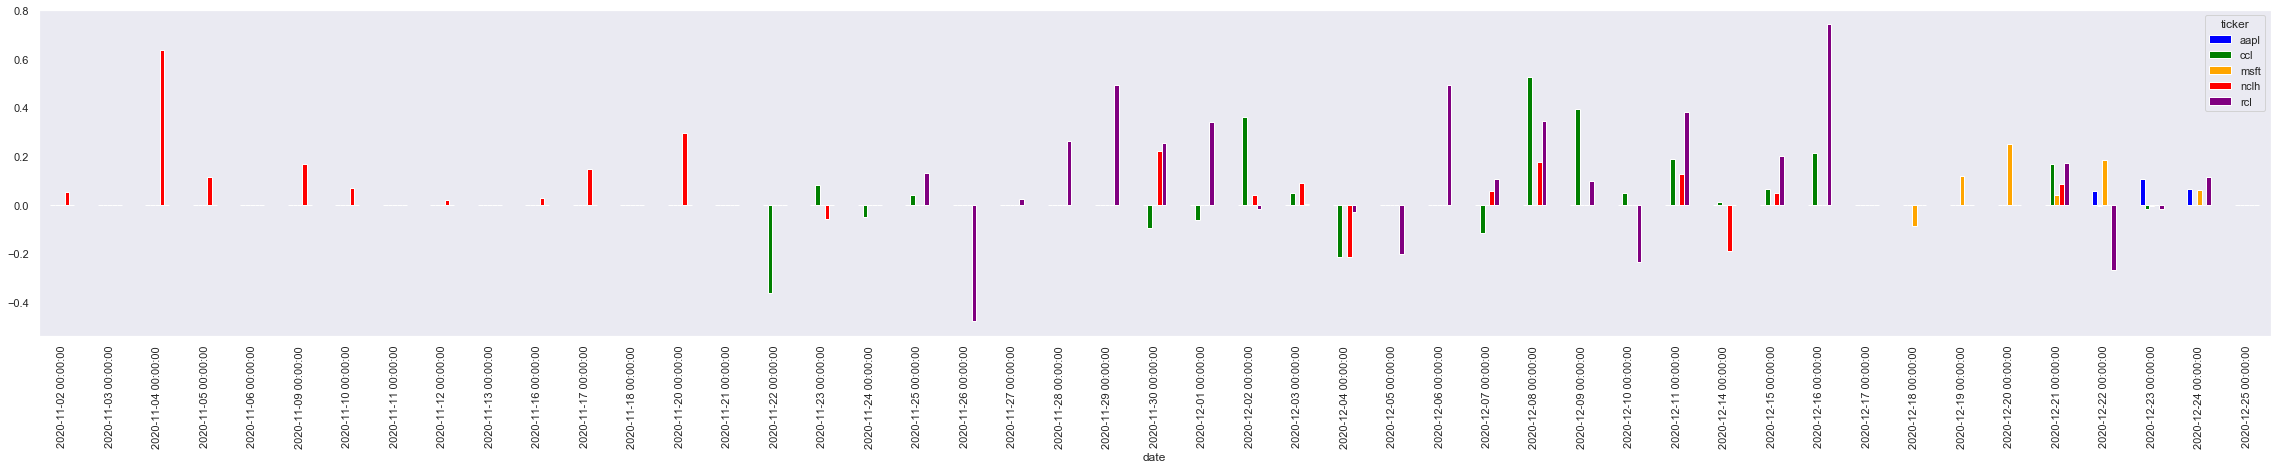

In [270]:
plt.rcParams['figure.figsize'] = [40, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar',color= ['blue','green','orange', 'red','purple'])



plt.grid()

In [28]:
parsed_and_scored_news.head()

NameError: name 'parsed_and_scored_news' is not defined

In [272]:
parsed_and_scored_news['sentiment'] = np.where(parsed_and_scored_news['compound'] >= .05, 'positive',np.where((parsed_and_scored_news['compound'] >= -.05) & (parsed_and_scored_news['compound'] <= .05), 'neutral','negative'))


In [273]:
import textwrap

cols = ['Very Long Column Title ' + str(i) for i in range(2)]

# Split wide columns, you can then join these with any delimiter you'd like
cols = [textwrap.wrap(x, width=20) for x in cols]

# print(cols)
# [['Very Long Column', 'Title 0'], ['Very Long Column', 'Title 1']]


In [274]:
pd.set_option('display.max_rows', None)

In [275]:
t = parsed_and_scored_news[parsed_and_scored_news['ticker']=='aapl']
t

,ticker,date,time,headline,neg,neu,pos,compound,sentiment
400,aapl,2020-12-25,09:32PM,"Dow Jones Futures: As Stock Market Pauses, Is Microsoft The Next Apple? Five Large Cap Stocks Flashing Buy Signals",0.000,1.000,0.000,0.0000,neutral
401,aapl,2020-12-25,02:12PM,15 Biggest Tech Companies: How Big Can They Get?,0.000,1.000,0.000,0.0000,neutral
402,aapl,2020-12-24,06:33PM,QuantumScape Was Unknown a Few Months Ago. Now Its One of the Most Valuable Stocks in the Car Industry.,0.000,0.834,0.166,0.5256,positive
403,aapl,2020-12-24,04:52PM,Fitness Stocks Are Expensive Lifts. How to Invest in the Home-Gym Boom.,0.000,0.840,0.160,0.2732,positive
404,aapl,2020-12-24,04:07PM,Apple Fuels Big Gains For Top Stock Growth Play That's Now In Buy Range,0.000,0.521,0.479,0.8020,positive
405,aapl,2020-12-24,01:50PM,"The Zacks Analyst Blog Highlights: Apple, JPMorgan, Union Pacific, Pfizer and Lockheed Martin",0.000,1.000,0.000,0.0000,neutral
406,aapl,2020-12-24,01:37PM,People have to keep in mind that next year wont be all sunshine and rainbows: Joe Fahmy,0.141,0.859,0.000,-0.3875,negative
407,aapl,2020-12-24,01:27PM,"Stock Market Rally Near Highs Amid Stimulus Deal Twists; China Probes Alibaba, Apple Car Buzz Returns",0.000,1.000,0.000,0.0000,neutral
408,aapl,2020-12-24,12:54PM,Why Velodyne Lidar Stock Sank 10% Today,0.000,1.000,0.000,0.0000,neutral
409,aapl,2020-12-24,12:30PM,What Apple Would Want From the Auto Market. Its Not About Making Cars.,0.000,0.902,0.098,0.0772,positive


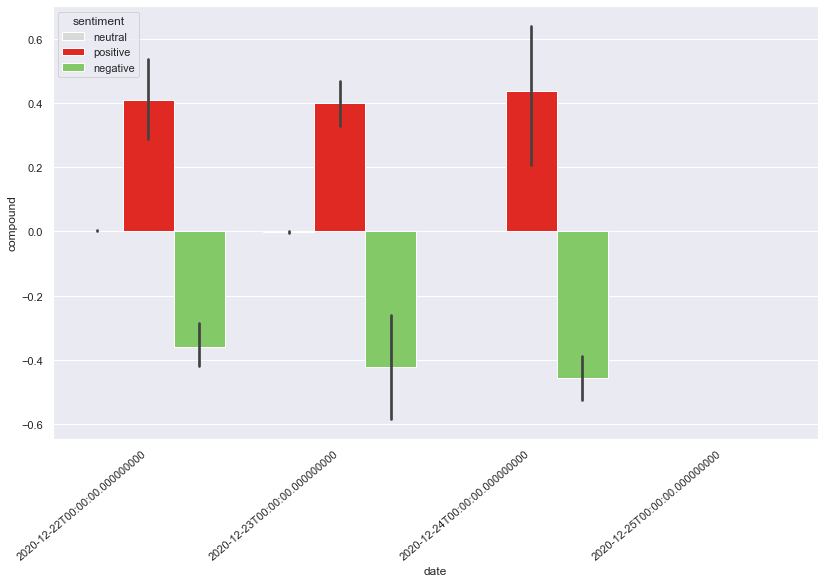

In [276]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

colors = ['#d9d9d9', "#FF0B04","#7ed957"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#plt.rcParams['figure.figsize'] = [40, 6]
ax = sns.barplot(x='date', y='compound',hue ='sentiment', data=t)






ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [277]:
import yfinance as yf

In [292]:
var = yf.Ticker('aapl')

vgt = yf.Ticker('vgt')

In [293]:
var.info
sa

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [299]:
vgt.info

{'previousClose': 350.55,
 'regularMarketOpen': 351.27,
 'twoHundredDayAverage': 308.87604,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 353.67,
 'navPrice': 352.73,
 'averageDailyVolume10Day': 426000,
 'totalAssets': 44440670208,
 'regularMarketPreviousClose': 350.55,
 'fiftyDayAverage': 335.67487,
 'trailingAnnualDividendRate': None,
 'open': 351.27,
 'toCurrency': None,
 'averageVolume10days': 426000,
 'expireDate': None,
 'yield': 0.0086,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 351.27,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 182411,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 576542,
 'priceToSalesTrailing12Months': None,
 'dayLow': 351.27,
 'ask': 353.92,
 'ytdReturn': None,
 'as

In [300]:
hist = var.history(period='3mo')
hist = hist.reset_index()
hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-25,108.243256,112.246352,107.484563,112.086624,149981400,0.0,0
1,2020-09-28,114.811926,115.121389,112.585763,114.762009,137672400,0.0,0
2,2020-09-29,114.352716,115.111401,113.374400,113.893501,99382200,0.0,0
3,2020-09-30,113.594025,117.058050,113.424319,115.610542,142675200,0.0,0
4,2020-10-01,117.437394,117.517258,115.630514,116.588860,116120400,0.0,0


In [301]:
hist2 = vgt.history(period='3mo')
hist2 = hist2.reset_index()
hist2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-25,296.649848,304.524198,294.903322,303.755707,647100,0.0,0
1,2020-09-28,308.536203,309.384521,306.240782,309.384521,668400,0.0,0
2,2020-09-29,309.254766,310.532223,308.127004,308.536194,542700,0.0,0
3,2020-09-30,308.616071,313.955425,308.077135,310.831665,729900,0.0,0
4,2020-10-01,314.963412,315.552237,312.807697,314.703918,701300,0.0,0


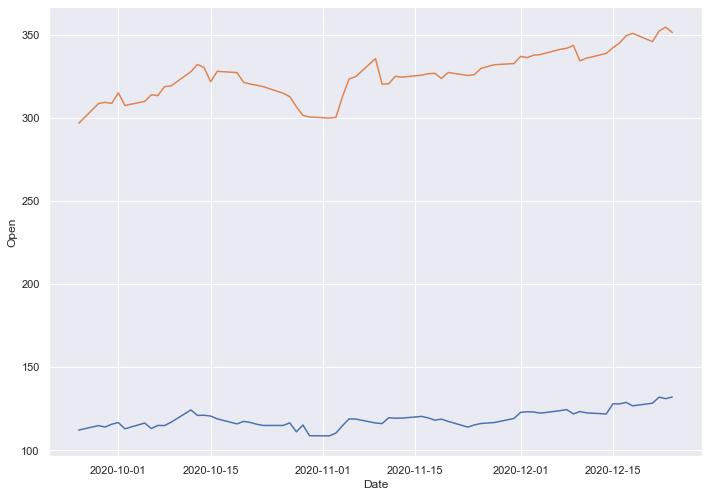

In [304]:
sns.set_palette('Set1')
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='Date',y='Close',data=hist)
#sns.lineplot(x='Date',y='Open',data=hist)
sns.lineplot(x='Date',y='Open',data=hist2)


#sns.lineplot(x='Date',y='Volume',data=hist)